# Example notebook for bolo-calc

In this notebook we will
  1. Use a configuration file to build a bolo python data structure
  2. Explore the resulting data structure and how we can modifiy it
  3. Run the analysis and look at the output

## Basics

In [1]:
# Standard imports
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from bolo import Top

#### Read a yaml file into a python dictionary

In [2]:
dd = yaml.safe_load(open('../config/myExample.yaml'))
dd

{'sim_config': {'nsky_sim': 50,
  'ndet_sim': 50,
  'save_summary': True,
  'save_sim': True,
  'config_dir': 'config'},
 'universe': {'dust': {'spectral_index': 1.5,
   'amplitude': 0.012,
   'scale_frequency': 353.0,
   'scale_temperature': {'var_type': 'pdf',
    'fname': 'Pdf/dustTemperature.txt'}},
  'synchrotron': {'spectral_index': -3.0,
   'amplitude': 0.0002,
   'scale_frequency': 30.0},
  'atmosphere': {'atm_model_file': 'atm_20201217.hdf5'}},
 'instrument': {'site': 'Atacama',
  'sky_temp': 'None',
  'elevation': 50.0,
  'pwv': {'var_type': 'pdf', 'fname': 'Pdf/pwv.txt'},
  'obs_time': 5.0,
  'sky_fraction': 0.2,
  'obs_effic': {'var_type': 'pdf', 'fname': 'Pdf/observationEfficiency.txt'},
  'NET': 1.0,
  'readout': {'read_noise_frac': 0.1,
   'dwell_time': 'None',
   'revisit_rate': 'None'},
  'optics_config': {'default': {'temperature': 273.0,
    'reflection': 0.0,
    'scatter_frac': 0.0,
    'spillover': 0.0},
   'elements': {'primary': {'obj_type': 'Mirror',
     'temp

#### Point the config_dir variable at the right place

In [3]:
dd['sim_config']['config_dir'] = '../config'

#### Use the python dictionary to construct a top-level bolo object

In [4]:
top = Top(**dd)

## Exploring the resulting object

Note the different between a few different ways to print and object. 1 and 2 are equivalent, as are 3 and 4.

    1. top # Asking the python interpreter to print the representation of object
    2. print(repr(top) # Explicitly printing the representation of the object
    3. print(top) # Print the object
    4. print(str(top)) # Convert the object to a string and print that


In [5]:
top

In [6]:
print(repr(top))

In [7]:
print(top)

<class 'bolo.top.Top'>
  Parameters:
    sim_config : <bolo.top.SimConfig object at 0x7fd7866fc150>
    universe   : <bolo.sky.Universe object at 0x7fd7866fc110>
    instrument : <bolo.instrument.Instrument object at 0x7fd786512550>


In [8]:
print(str(top))

<class 'bolo.top.Top'>
  Parameters:
    sim_config : <bolo.top.SimConfig object at 0x7fd7866fc150>
    universe   : <bolo.sky.Universe object at 0x7fd7866fc110>
    instrument : <bolo.instrument.Instrument object at 0x7fd786512550>


#### Ok, lets work our way down the hierarchy

I've left an open cell for you to play with things like tab-completion

In [9]:
print(top.universe)

<class 'bolo.sky.Universe'>
  Parameters:
    dust        : <bolo.sky.Dust object at 0x7fd7866fc590>
    synchrotron : <bolo.sky.Synchrotron object at 0x7fd78596ab50>
    atmosphere  : <bolo.sky.Atmosphere object at 0x7fd7866fcd50>


In [10]:
print(str(top.universe.dust))

<class 'bolo.sky.Dust'>
  Parameters:
    amplitude         : <bolo.cfg.VariableHolder object at 0x7fd7866fc7d0>
    scale_temperature : <bolo.cfg.VariableHolder object at 0x7fd7866fca50>
    spectral_index    : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fc9d0>
    scale_frequency   : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fc1d0>
    emiss             : <cfgmdl.param_holder.ParamHolder object at 0x7fd7863d4c90>


In [11]:
print(top.instrument)

<class 'bolo.instrument.Instrument'>
  Parameters:
    site            : 'Atacama'
    sky_temp        : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fc610>
    obs_time        : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fcad0>
    sky_fraction    : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fcd90>
    NET             : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fccd0>
    custom_atm_file : None
    elevation       : <bolo.cfg.VariableHolder object at 0x7fd7866fcfd0>
    pwv             : <bolo.cfg.VariableHolder object at 0x7fd7866fcc90>
    obs_effic       : <bolo.cfg.VariableHolder object at 0x7fd7866fce90>
    readout         : <bolo.readout.Readout object at 0x7fd7866fcd10>
    camera_config   : {'default': {'boresite_elevation': 0, 'optical_coupling': 1, 'f_number': 2.5, 'bath_temperature': 0.1}, 'elements': {'cam_1': {'skip_optical_elements': [], 'chan_config': {'elements': {'chan_1': {'band_center': 100.0, 'det_eff': {'var_type': 'pdf', 'fname

In [12]:
print(top.instrument.optics)

<class 'cfgmdl.tools.Optics'>
  Parameters:
    primary    : <bolo.optics.Mirror object at 0x7fd786700850>
    mirror     : <bolo.optics.Mirror object at 0x7fd7867007d0>
    window     : <bolo.optics.OpticalElement object at 0x7fd786700ed0>
    IRshader1  : <bolo.optics.OpticalElement object at 0x7fd7866e5650>
    IRshader2  : <bolo.optics.OpticalElement object at 0x7fd7866e5510>
    IRshader3  : <bolo.optics.OpticalElement object at 0x7fd7866e5e50>
    abs_filter : <bolo.optics.OpticalElement object at 0x7fd7866e5b50>
    low_pass1  : <bolo.optics.OpticalElement object at 0x7fd7866e5150>
    lens1      : <bolo.optics.OpticalElement object at 0x7fd7866db350>
    low_pass2  : <bolo.optics.OpticalElement object at 0x7fd7866db6d0>
    lens2      : <bolo.optics.OpticalElement object at 0x7fd7866dba50>
    aperture   : <bolo.optics.ApertureStop object at 0x7fd782f649d0>
    low_pass3  : <bolo.optics.OpticalElement object at 0x7fd7866dba90>
    lens3      : <bolo.optics.OpticalElement object

In [13]:
print(top.instrument.optics.primary)

<class 'bolo.optics.Mirror'>
  Parameters:
    conductivity   : <cfgmdl.param_holder.ParamHolder object at 0x7fd786700c10>
    temperature    : <bolo.cfg.VariableHolder object at 0x7fd786700ad0>
    spillover_temp : <cfgmdl.param_holder.ParamHolder object at 0x7fd786700890>
    scatter_temp   : <cfgmdl.param_holder.ParamHolder object at 0x7fd786700750>
    surface_rough  : <cfgmdl.param_holder.ParamHolder object at 0x7fd786700b90>
    absorption     : <bolo.cfg.VariableHolder object at 0x7fd786700b50>
    reflection     : <bolo.cfg.VariableHolder object at 0x7fd786700a50>
    spillover      : <bolo.cfg.VariableHolder object at 0x7fd786700950>
    scatter_frac   : <bolo.cfg.VariableHolder object at 0x7fd786700290>


#### Ok, now try accessing a value, changing the value, etc...

In [14]:
# access the value
top.universe.dust.scale_frequency()
print("Orig:    %.3g" % top.universe.dust.scale_frequency())
# change the value
top.universe.dust.scale_frequency = 365.
print("Changed: %.3g" % top.universe.dust.scale_frequency())

Orig:    3.53e+11
Changed: 3.65e+11


### Updating parameters

Two methods allow use to manipulate the configuration objects
1. todict() will convert an object (and all its children) to a nested python dictionary
2. update() will update an object (and all its children) from a nested python dictionary 

In [15]:
val_dict = top.universe.synchrotron.todict()
print(top.universe.synchrotron)
val_dict

<class 'bolo.sky.Synchrotron'>
  Parameters:
    amplitude       : <bolo.cfg.VariableHolder object at 0x7fd7866fc490>
    spectral_index  : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fcc10>
    scale_frequency : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fce50>
    emiss           : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fced0>


OrderedDict([('amplitude',
              OrderedDict([('fname', None),
                           ('var_type', 'const'),
                           ('value', array(0.0002)),
                           ('errors', array(nan)),
                           ('bounds', array(nan)),
                           ('scale', array(1.)),
                           ('free', array(False)),
                           ('unit', <cfgmdl.unit.Unit at 0x7fd7866fc990>)])),
             ('spectral_index',
              OrderedDict([('value', array(-3.)),
                           ('errors', array(nan)),
                           ('bounds', array(nan)),
                           ('scale', array(1.)),
                           ('free', array(False)),
                           ('unit', None)])),
             ('scale_frequency',
              OrderedDict([('value', array(30.)),
                           ('errors', array(nan)),
                           ('bounds', array(nan)),
                           ('sc

In [16]:
val_dict['spectral_index'] = 2.
val_dict['amplitude'] = 0.0003
top.universe.synchrotron.update(**val_dict)
print(top.universe.synchrotron)

<class 'bolo.sky.Synchrotron'>
  Parameters:
    amplitude       : <bolo.cfg.VariableHolder object at 0x7fd7866fc490>
    spectral_index  : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fcc10>
    scale_frequency : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fce50>
    emiss           : <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fced0>


#### Ok, now try setting an illegal value

In [17]:
save_val = top.universe.dust.scale_frequency.value
try: 
    top.universe.dust.scale_frequency = "afda"
except TypeError as msg:
    print("Caught %s" % msg)
else: 
    raise TypeError("Failed to catch TypeError")
#print("Value is set to %s" % top.universe.dust.scale_frequency
top.universe.dust.scale_frequency = save_val

Caught Failed to set <cfgmdl.param_holder.ParamHolder object at 0x7fd7866fc1d0> _value could not convert string to float: 'afda'


#### Use this cell to play around with the python structure

## Ok, now run the data

In [18]:
top.run()

### Let's print a high-level summary of results

In [19]:
top.instrument.print_summary()

cam_1_chan_1 ---------
effic                : 0.137 +- [0.0269 0.0157] 
opt_power            : 2.47 +- [0.506 0.322] 
tel_rj_temp          : 17.1 +- [1.42 1.51] 
sky_rj_temp          : 10.9 +- [0.0534 0.0588] 
NEP_bolo             : 11.1 +- [1.19 0.697] 
NEP_read             : 14 +- [2.25 1.37] 
NEP_ph               : 28.4 +- [4.81 2.93] 
NEP_ph_corr          : 28.4 +- [4.81 2.93] 
NEP                  : 33.5 +- [5.4 3.29] 
NEP_corr             : 33.5 +- [5.4 3.29] 
NET                  : 8.17 +- [0.396 0.537] 
NET_corr             : 8.17 +- [0.396 0.537] 
NET_RJ               : 6.34 +- [0.307 0.416] 
NET_corr_RJ          : 6.34 +- [0.307 0.416] 
NET_arr              : 0.242 +- [0.0117 0.0159] 
NET_arr_RJ           : 0.188 +- [0.00911 0.0123] 
corr_fact            : 1 +- [0 0] 
map_depth            : 0.167 +- [0.0115 0.0148] 
map_depth_RJ         : 0.13 +- [0.00896 0.0115] 
---------
cam_1_chan_2 ---------
effic                : 0.144 +- [0.0251 0.0241] 
opt_power            : 4.74 +- 

### Let's get the data

In [20]:
tabs = top.instrument.tables

In [21]:
tabs.keys()

dict_keys(['cam_1_chan_1_sims', 'cam_1_chan_2_sims', 'cam_2_chan_1_sims', 'cam_2_chan_2_sims', 'summary'])

In [22]:
tabs['summary']

effic_mean,effic_median,effic_std,effic_n_2_sig,effic_n_1_sig,effic_p_1_sig,effic_p_2_sig,opt_power_mean,opt_power_median,opt_power_std,opt_power_n_2_sig,opt_power_n_1_sig,opt_power_p_1_sig,opt_power_p_2_sig,tel_rj_temp_mean,tel_rj_temp_median,tel_rj_temp_std,tel_rj_temp_n_2_sig,tel_rj_temp_n_1_sig,tel_rj_temp_p_1_sig,tel_rj_temp_p_2_sig,sky_rj_temp_mean,sky_rj_temp_median,sky_rj_temp_std,sky_rj_temp_n_2_sig,sky_rj_temp_n_1_sig,sky_rj_temp_p_1_sig,sky_rj_temp_p_2_sig,NEP_bolo_mean,NEP_bolo_median,NEP_bolo_std,NEP_bolo_n_2_sig,NEP_bolo_n_1_sig,NEP_bolo_p_1_sig,NEP_bolo_p_2_sig,NEP_read_mean,NEP_read_median,NEP_read_std,NEP_read_n_2_sig,NEP_read_n_1_sig,NEP_read_p_1_sig,NEP_read_p_2_sig,NEP_ph_mean,NEP_ph_median,NEP_ph_std,NEP_ph_n_2_sig,NEP_ph_n_1_sig,NEP_ph_p_1_sig,NEP_ph_p_2_sig,NEP_ph_corr_mean,NEP_ph_corr_median,NEP_ph_corr_std,NEP_ph_corr_n_2_sig,NEP_ph_corr_n_1_sig,NEP_ph_corr_p_1_sig,NEP_ph_corr_p_2_sig,NEP_mean,NEP_median,NEP_std,NEP_n_2_sig,NEP_n_1_sig,NEP_p_1_sig,NEP_p_2_sig,NEP_corr_mean,NEP_corr_median,NEP_corr_std,NEP_corr_n_2_sig,NEP_corr_n_1_sig,NEP_corr_p_1_sig,NEP_corr_p_2_sig,NET_mean,NET_median,NET_std,NET_n_2_sig,NET_n_1_sig,NET_p_1_sig,NET_p_2_sig,NET_corr_mean,NET_corr_median,NET_corr_std,NET_corr_n_2_sig,NET_corr_n_1_sig,NET_corr_p_1_sig,NET_corr_p_2_sig,NET_RJ_mean,NET_RJ_median,NET_RJ_std,NET_RJ_n_2_sig,NET_RJ_n_1_sig,NET_RJ_p_1_sig,NET_RJ_p_2_sig,NET_corr_RJ_mean,NET_corr_RJ_median,NET_corr_RJ_std,NET_corr_RJ_n_2_sig,NET_corr_RJ_n_1_sig,NET_corr_RJ_p_1_sig,NET_corr_RJ_p_2_sig,NET_arr_mean,NET_arr_median,NET_arr_std,NET_arr_n_2_sig,NET_arr_n_1_sig,NET_arr_p_1_sig,NET_arr_p_2_sig,NET_arr_RJ_mean,NET_arr_RJ_median,NET_arr_RJ_std,NET_arr_RJ_n_2_sig,NET_arr_RJ_n_1_sig,NET_arr_RJ_p_1_sig,NET_arr_RJ_p_2_sig,corr_fact_mean,corr_fact_median,corr_fact_std,corr_fact_n_2_sig,corr_fact_n_1_sig,corr_fact_p_1_sig,corr_fact_p_2_sig,map_depth_mean,map_depth_median,map_depth_std,map_depth_n_2_sig,map_depth_n_1_sig,map_depth_p_1_sig,map_depth_p_2_sig,map_depth_RJ_mean,map_depth_RJ_median,map_depth_RJ_std,map_depth_RJ_n_2_sig,map_depth_RJ_n_1_sig,map_depth_RJ_p_1_sig,map_depth_RJ_p_2_sig
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.13710197060440601,0.14028874531614166,0.02228937044201951,0.08649847073646738,0.11341287677352149,0.1559436344389584,0.17801978120899298,2.4693423274169026,2.5200172501435776,0.4214843645645753,1.4792473421386279,2.01434276052328,2.8420985870015323,3.110435268717583,17.076714011435474,17.035175179187043,1.3996813455343478,14.906236564430927,15.614808820717212,18.546294763572497,19.75949525813773,10.887394925404134,10.885080163851608,0.05256239332398824,10.790643766835737,10.831700566867914,10.943928468216065,11.011796283016606,11.086073980239625,11.243396231129356,0.9855503823990687,8.61423924840329,10.052248512686045,11.940323685045886,12.49128492067982,13.96284866538121,14.1831449393607,1.8381622072683557,9.559824720953957,11.931932794420316,15.552523865752375,16.739360347670146,28.375877026

In [23]:
tabs['cam_1_chan_1_sims']

effic,opt_power,tel_rj_temp,sky_rj_temp,NEP_bolo,NEP_read,NEP_ph,NEP_ph_corr,NEP,NEP_corr,NET,NET_corr,NET_RJ,NET_corr_RJ,NET_arr,NET_arr_RJ,corr_fact,map_depth,map_depth_RJ
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.14834853402079146,2.7494875065884274,17.4681438995637,10.945035678503737,11.744172078715927,15.10427136943541,30.796926428313693,30.796926428313693,36.25624454969107,36.25624454969107,8.125229660418505,8.125229660418505,6.307067176891846,6.307067176891846,0.2408387445080538,0.18694685613752232,1.0,0.17662377370210564,0.13710111004024791
0.15216789208940126,2.5983054588208687,15.800560367293526,10.788042872502098,11.416727456458508,14.582250741650814,29.702516076782054,29.702516076782054,35.00318790908802,35.00318790908802,7.635277308545454,7.635277308545454,5.926750247292552,5.926750247292552,0.226316138474073,0.17567393762716305,1.0,0.16597333833735525,0.12883389617479202
0.1431678875707244,2.693747816572157,18.089328063572363,10.884977476223133,11.624519181268568,14.964997297012964,30.51728319045207,30.51728319045207,35.92193151295646,35.92193151295646,8.331954540221508,8.331954540221508,6.467533743197527,6.467533743197527,0.24696624644844442,0.19170322217020722,1.0,0.18111749633086888,0.14058928350468494
0.11341287677352149,1.8754399170992566,14.906236564430927,10.904060597088373,9.699472328313064,11.346659121713145,22.78156344193142,22.78156344193142,27.236484162439417,27.236484162439417,7.9627540190962565,7.9627540190962565,6.180948306748399,6.180948306748399,0.2360228277765167,0.1832085851453695,1.0,0.17309192757536773,0.13435957635926218
0.08608310744389396,1.5681404992319776,17.353846245477015,11.011796283016606,8.869293287801364,10.020891188634764,19.98794206696576,19.98794206696576,24.05411506815156,24.05411506815156,9.24879308305993,9.24879308305993,7.179213599856215,7.179213599856215,0.27414212366080937,0.21279802075840146,1.0,0.20104745401569826,0.15605956400188342
0.12997453085104893,2.246906006900192,16.071532419313726,10.864987148296292,10.616686257411168,13.051316351112268,26.427521081545944,26.427521081545944,31.328337908364514,31.328337908364514,7.990922203242031,7.990922203242031,6.202813366209291,6.202813366209291,0.23685775680477392,0.1838566841763185,1.0,0.17370423900410167,0.13483487237864938
0.1520501200270626,2.9976742262747402,19.4567207202095,10.917778409235272,12.262774656873795,16.36765095845796,33.54606733164209,33.54606733164209,39.28885686301195,39.28885686301195,8.580099236762754,8.580099236762754,6.660151716606842,6.660151716606842,0.2543214671214619,0.19741258336052167,1.0,0.1865115903514705,0.14477635448830717
0.13366118126704593,2.664536679159672,19.75949525813773,10.820424282709945,11.56131894094801,14.845265288192898,30.26175028688517,30.26175028688517,35.63452718301371,35.63452718301371,8.846719042487456,8.846719042487456,6.867110669851857,6.867110669851857,0.26222430580484396,0.20354702343758688,1.0,0.1923072906822835,0.14927516533443524
0.14952225734435598,2.7058470817171,17.34756116827336,10.900550984402468,11.650596336382089,14.935396649960307,30.43818326840782,30.43818326840782,35.85087821471249,35.85087821471249,7.957581511293783,7.957581511293783,6.176933238184599,6.176933238184599,0.235869510228931,0.18308957508504717,1.0,0.17297948917229994,0.13427229801870458


### Let's plot a distribution

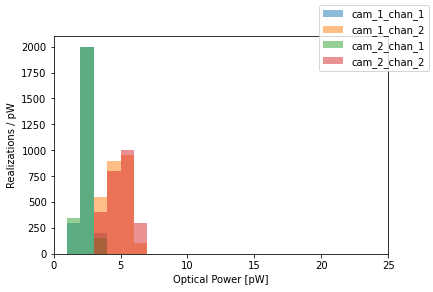

In [24]:
bins = np.linspace(0.0, 25., 26)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(bins[0], bins[-1])
ax.set_xlabel('Optical Power [pW]')
ax.set_ylabel('Realizations / pW')
for chan in ['cam_1_chan_1', 'cam_1_chan_2', 'cam_2_chan_1', 'cam_2_chan_2']:
    ax.hist(tabs['%s_sims' % chan]['opt_power'], bins, label=chan, alpha=0.5)
leg = fig.legend()